## Exercise
Every year, the city of Munich updates a data set that shows visitor numbers, drinking mood and Hendl consumption.

https://opendata.muenchen.de/en/dataset/oktoberfest/resource/e0f664cf-6dd9-4743-bd2b-81a8b18bd1d2

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("Oktoberfest.csv")

In [2]:
df.head()

,jahr,dauer,besucher_gesamt,besucher_tag,bier_preis,bier_konsum,hendl_preis,hendl_konsum
0,1985,16,7.1,444,3.20,54541,4.77,629520
1,1986,16,6.7,419,3.30,53807,3.92,698137
2,1987,16,6.5,406,3.37,51842,3.98,732859
3,1988,16,5.7,356,3.45,50951,4.19,720139
4,1989,16,6.2,388,3.60,51241,4.22,775674


### Task 1
Create **two different visualizations** and display them **side by side** using subplots. The goal is to analyze historical Oktoberfest data and explore possible relationships between key variables.

**Beer Price Development**  
- Create a **line plot** that shows how **beer prices** have changed over the years.  
- Make sure to label the axes and add a **title** to the plot.  

**Relationship Between Beer and Roasted Chicken Consumption**  
- Create a **scatter plot** that examines the relationship between **beer consumption and roasted chicken consumption**.  
- Add a **regression line** to highlight possible trends.  
- Ensure the axes are properly labeled and add a **title** to the plot.  

**Subplots**  
- Display both visualizations **side by side** using **subplots**.  
- Adjust the layout so that the figures are **well-proportioned and easy to read**.  


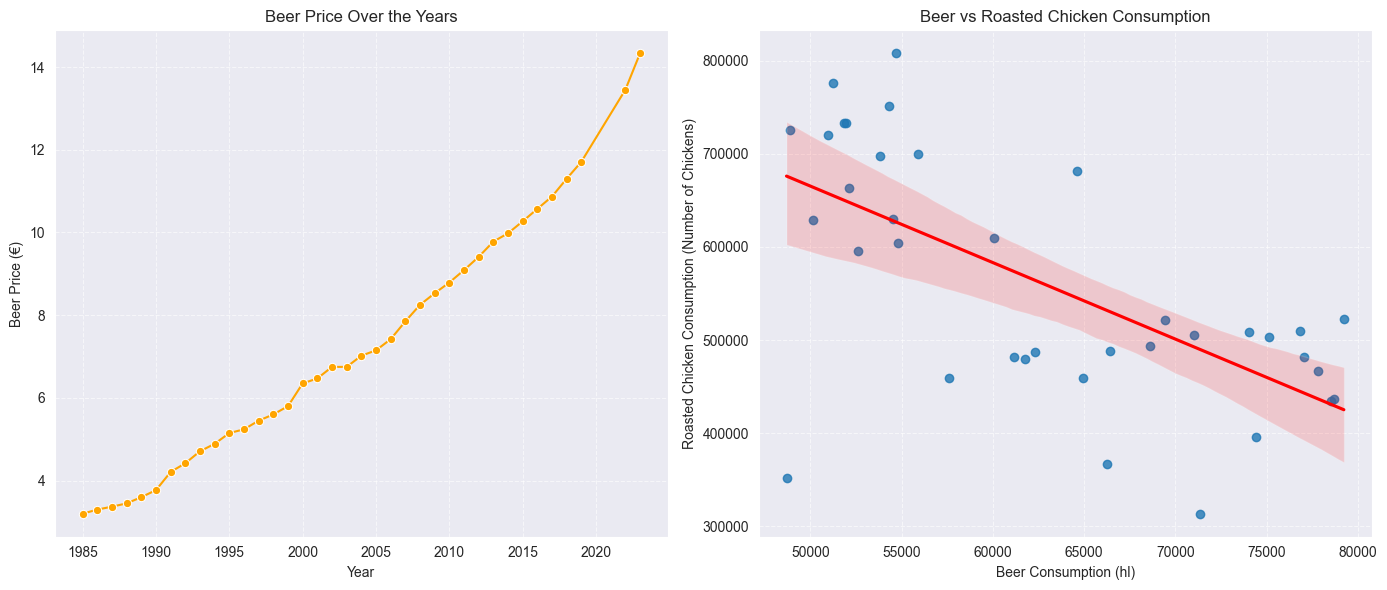

In [3]:
# Set up subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Line plot for beer price development
sns.lineplot(x='jahr', y='bier_preis', data=df, ax=ax1, marker='o', color='orange')
ax1.set_title('Beer Price Over the Years')
ax1.set_xlabel('Year')
ax1.set_ylabel('Beer Price (€)')
ax1.grid(True, linestyle='--', alpha=0.6)

# Scatter plot for beer vs roasted chicken consumption, also added a regression line
sns.regplot(x='bier_konsum', y='hendl_konsum', data=df, ax=ax2, line_kws={'color': 'red'})
ax2.set_title('Beer vs Roasted Chicken Consumption')
ax2.set_xlabel('Beer Consumption (hl)')
ax2.set_ylabel('Roasted Chicken Consumption (Number of Chickens)')
ax2.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()



### Task 2: Analyzing Beer and Roasted Chicken Prices vs. Consumption
Analyze how **beer and roasted chicken prices** have evolved over time and how this relates to **beer consumption** at the Oktoberfest.

**Plot Beer and Roasted Chicken Prices Over Time**  
- Create a **line plot** showing the **beer and roasted chicken prices** over the years.  
- Use **distinct colors and markers** to differentiate both price trends.  
- Label the axes properly and add a **legend** to indicate which line corresponds to which price.

**Overlay Beer Consumption on a Secondary Y-Axis**  
- Use a **secondary Y-axis** (`twinx()`) to plot the **beer consumption** over time.  
- Ensure that the **scales on both axes are appropriate** and clearly distinguishable.
- Add a **legend** to show the corresponding label.

**Final Touches**  
- Give the visualization a **clear title** and adjust gridlines to enhance readability.  
- Make sure that **both Y-axes are correctly labeled**, indicating units (€/hl).  


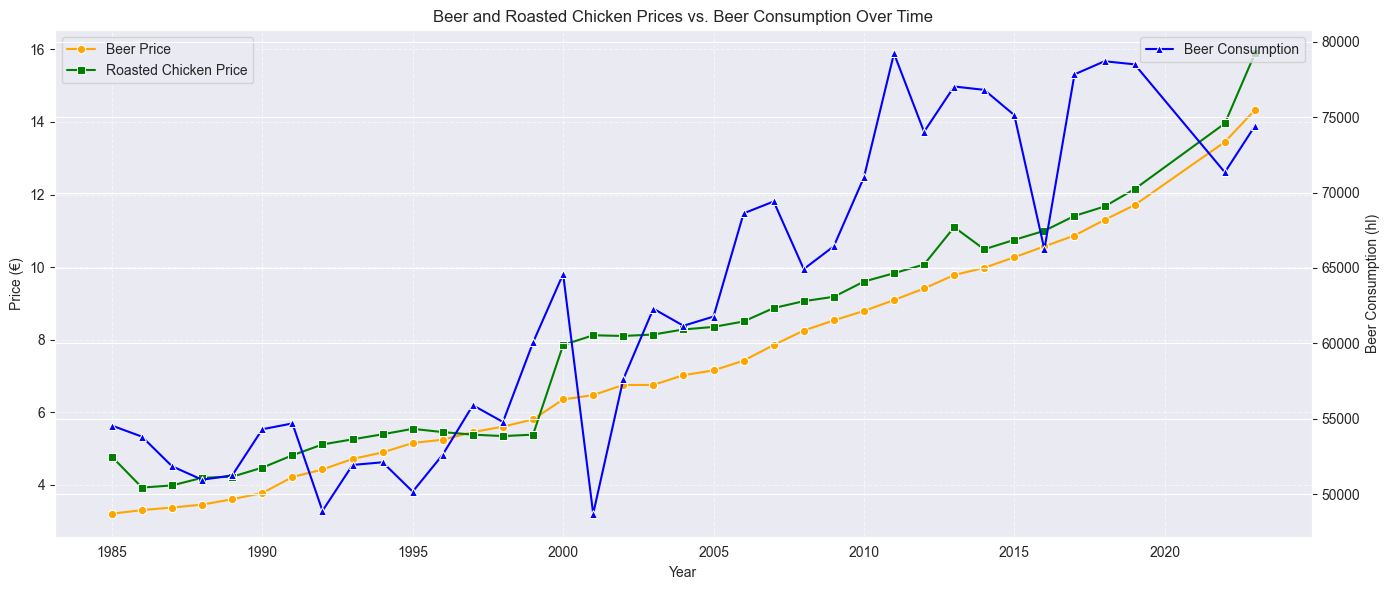

In [4]:
fig, ax1 = plt.subplots(figsize=(14, 6))

sns.lineplot(x='jahr', y='bier_preis', data=df, ax=ax1, marker='o', color='orange', label='Beer Price')
sns.lineplot(x='jahr', y='hendl_preis', data=df, ax=ax1, marker='s', color='green', label='Roasted Chicken Price')

ax1.set_title('Beer and Roasted Chicken Prices vs. Beer Consumption Over Time')
ax1.set_xlabel('Year')
ax1.set_ylabel('Price (€)')
ax1.legend(loc='upper left')
ax1.grid(True, linestyle='--', alpha=0.6)

ax2 = ax1.twinx()
sns.lineplot(x='jahr', y='bier_konsum', data=df, ax=ax2, marker='^', color='blue', label='Beer Consumption')

ax2.set_ylabel('Beer Consumption (hl)')
ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()


### Task 3: Visualizing the Relationship Between Beer Price, Visitors, and Beer Consumption
**Create a Bubble Chart**  
- Generate a **scatter plot** with:  
  - **Total visitors (in millions) on the X-axis**  
  - **Beer price (in €) on the Y-axis**  
- Each point should **represent a year**, so color-code the points by year (`hue` parameter).

**Represent Beer Consumption with Bubble Size**  
- The **bubble size should reflect beer consumption** (larger bubbles for higher beer consumption).  
- Adjust the scaling so that differences in consumption are clearly visible but not overwhelming.

**Final Touches**  
- Use **circular markers (`marker="o"`)** to ensure a clean and readable plot.  
- Label both axes properly and add a **title**.  
- Include a **legend** that differentiates the years.
- Apply **aesthetic improvements**, such as adjusting transparency (`alpha`) and adding gridlines for readability.


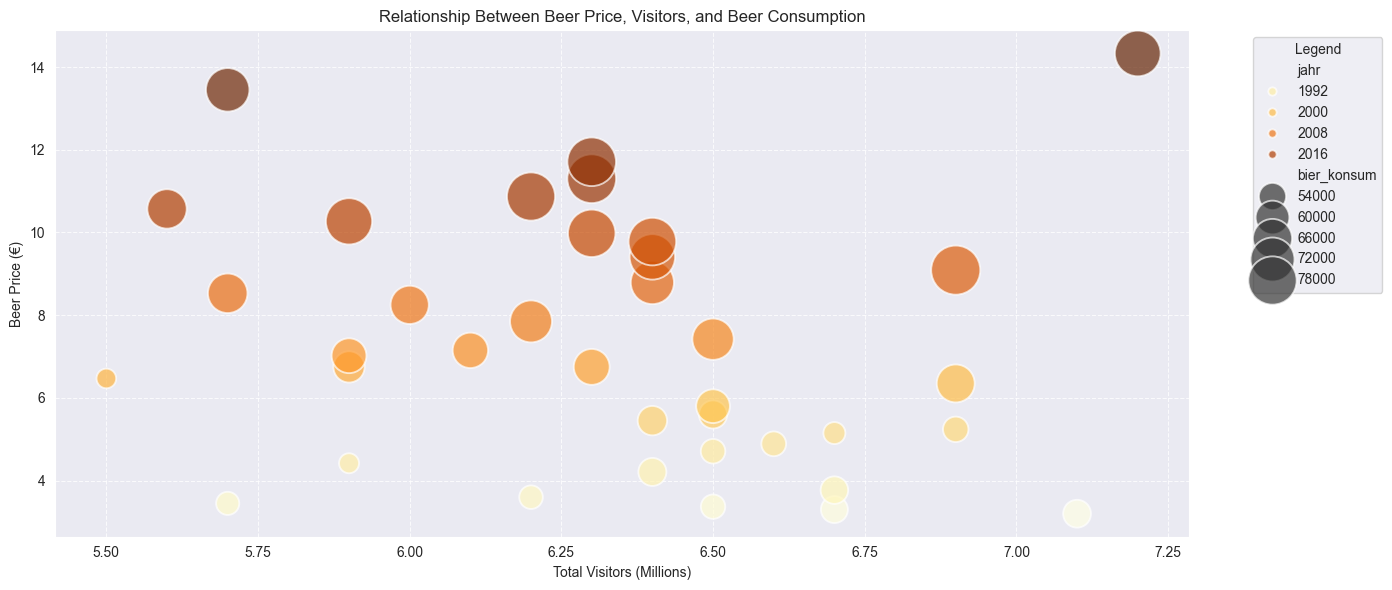

In [5]:
plt.figure(figsize=(14, 6))

sns.scatterplot(
    x='besucher_gesamt',
    y='bier_preis',
    size='bier_konsum',
    hue='jahr',
    palette='YlOrBr',
    data=df,
    alpha=0.7,
    edgecolor='w',
    sizes=(200, 1250),
    marker='o'
)

plt.title('Relationship Between Beer Price, Visitors, and Beer Consumption')
plt.xlabel('Total Visitors (Millions)')
plt.ylabel('Beer Price (€)')
plt.legend(title='Legend', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.8)

plt.tight_layout()
plt.show()